# <div align="center">Hierarchical Clustering</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

<img src="main.gif" />

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt  
%matplotlib inline
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import scale

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import AgglomerativeClustering


One of the benefits of hierarchical clustering is that you don't need to already know the number of clusters k in your data in advance. Sadly, there doesn't seem to be much documentation on how to actually use scipy's hierarchical clustering to make an informed decision and then retrieve the clusters.

In the following I'll explain:

* how to use scipy's hierarchical clustering
* how to plot a nice dendrogram from it
* how to use the dendrogram to select a distance cut-off (aka determining the number of clusters k in your data)
* how to retrieve the k clusters
* how to visualize the clusters (2D case)

### Theory of Hierarchical Clustering
There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this article we will focus on agglomerative clustering that involves the bottom-up approach.

### Steps to Perform Hierarchical Clustering
Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

* Measure the distance between the closes points of two clusters.
* Measure the distance between the farthest points of two clusters.
* Measure the distance between the centroids of two clusters.
* Measure the distance between all possible combination of points between the two clusters and take the mean.

### Role of Dendrograms for Hierarchical Clustering
In the last section, we said that once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points. Let's see how it's actually done.

Suppose we have a collection of data points represented by a numpy array as follows

In [2]:
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

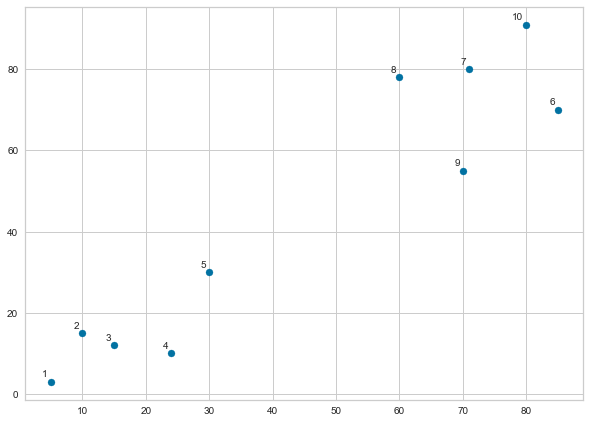

In [3]:
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show() 

Let's name the above plot as Graph1. It can be seen from the naked eye that the data points form two clusters: first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. This is why clustering algorithms have been developed.

Coming back to use of dendrograms in hierarchical clustering, let's draw the dendrograms for our data points. We will use the scipy library for that purpose. Execute the following script:

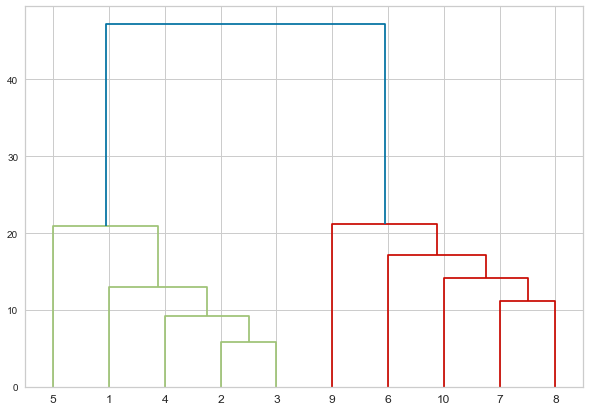

In [4]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph2, you can see that the dendograms have been created joining points 2 with 3, and 8 with 7. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph1, point 4 is closest to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 with dendrogram of point 2 and 3. This process continues until all the points are joined together to form one big cluster.

### Hierarchical Clustering via Scikit-Learn
Enough of the theory, now let's implement hierarchical clustering using Python's Scikit-Learn library.

#### Example 1
In our first example we will cluster the X numpy array of data points that we created in the previous section.

The process of clustering is similar to any other unsupervised machine learning algorithm. We start by importing the required libraries:

In [5]:
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [6]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In the code above we import the AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.

Next we call the fit_predict method from the AgglomerativeClustering class variable cluster. This method returns the names of the clusters that each data point belongs to. Execute the following script to see how the data points have been clustered.

In [7]:
print(cluster.labels_)  

[1 1 1 1 1 0 0 0 0 0]


The output is a one-dimensional array of 10 elements corresponding to the clusters assigned to our 10 data points.

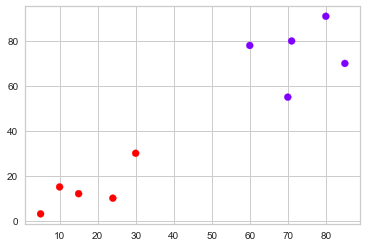

In [8]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  

#### Example 2
In the last section we performed hierarchical clustering on dummy data. In this example, we will perform hierarchical clustering on real-world data and see how it can be used to solve an actual problem.

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem can be downloaded from the following link:  
https://drive.google.com/open?id=18Dsja5_1jRY1GnWoORXFFKGTJhylk6rJ

In [9]:
customer_data = pd.read_csv('Input/shopping_data.csv')  

In [10]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [11]:
data = customer_data.iloc[:, 3:5].values  

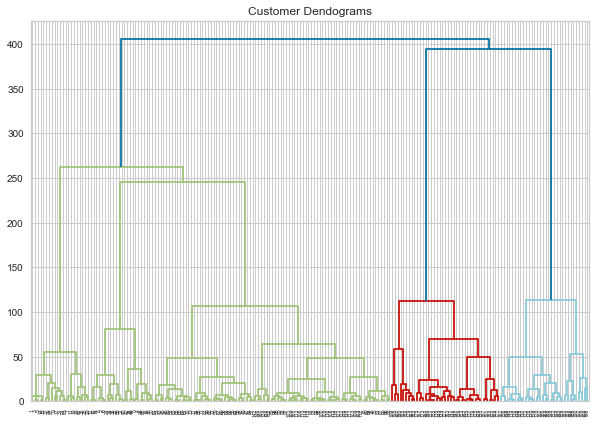

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = dendrogram(linkage(data, method='ward'), 
                  distance_sort = 'descending',
                  show_leaf_counts=True)  

In [13]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

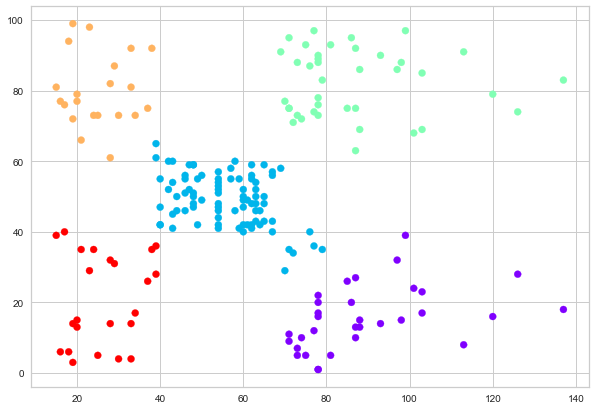

In [14]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.

### Example 3

In [15]:
data = pd.read_csv("Input/driver.txt",sep = '\t', usecols = [1,2])
data.head(5)

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


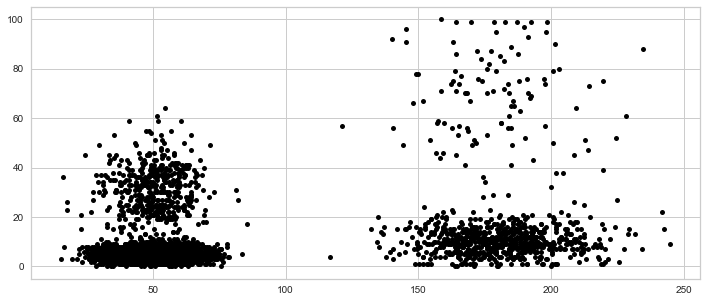

In [16]:
plt.figure(figsize = (12,5))
plt.plot(data.Distance_Feature, data.Speeding_Feature, '.', markersize = 10, color = "black")
plt.show()

In [17]:
mod_cluster = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
groups = mod_cluster.fit(data)
groups.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
classes = groups.labels_
print(classes)
data_draw = pd.DataFrame.copy(data)
data_draw['class'] = classes
data_draw.head(5)

[1 1 1 ... 0 0 0]


,Distance_Feature,Speeding_Feature,class
0,71.24,28.0,1
1,52.53,25.0,1
2,64.54,27.0,1
3,55.69,22.0,1
4,54.58,25.0,1


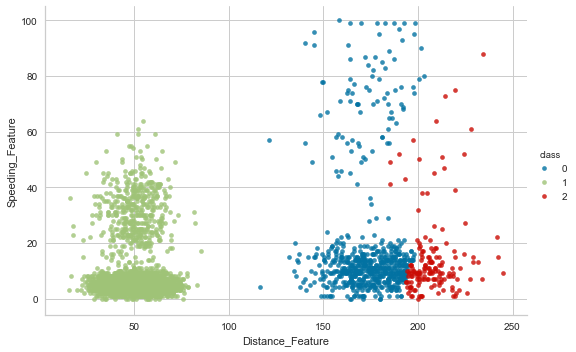

In [19]:
sns.lmplot(x = "Distance_Feature", y = "Speeding_Feature", data = data_draw, 
           hue = 'class',fit_reg=False, scatter_kws = {'s':22}, aspect = 1.5)

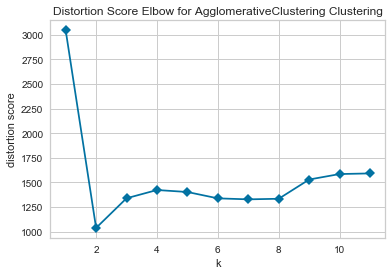

In [20]:
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    model, k=(1,12), metric='distortion', timings=False
)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [21]:
data_np = np.copy(np.array(data[1:20]))
data_np

array([[52.53, 25.  ],
       [64.54, 27.  ],
       [55.69, 22.  ],
       [54.58, 25.  ],
       [41.91, 10.  ],
       [58.64, 20.  ],
       [52.02,  8.  ],
       [31.25, 34.  ],
       [44.31, 19.  ],
       [49.35, 40.  ],
       [58.07, 45.  ],
       [44.22, 22.  ],
       [55.73, 19.  ],
       [46.63, 43.  ],
       [52.97, 32.  ],
       [46.25, 35.  ],
       [51.55, 27.  ],
       [57.05, 26.  ],
       [58.45, 30.  ]])

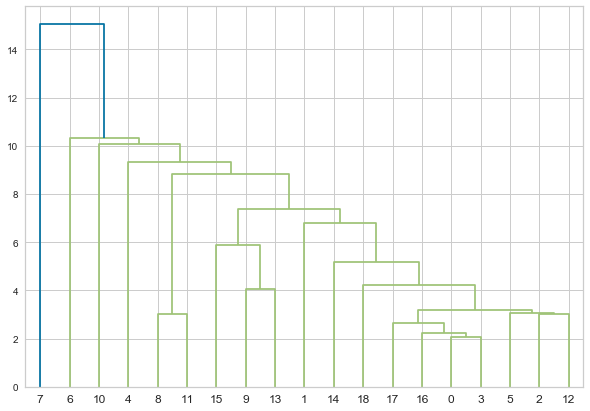

In [22]:
linked = linkage(data_np, 'single')

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation = 'top',
            distance_sort = 'descending',
            show_leaf_counts=True)
plt.show() 

### Example 4

In [23]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

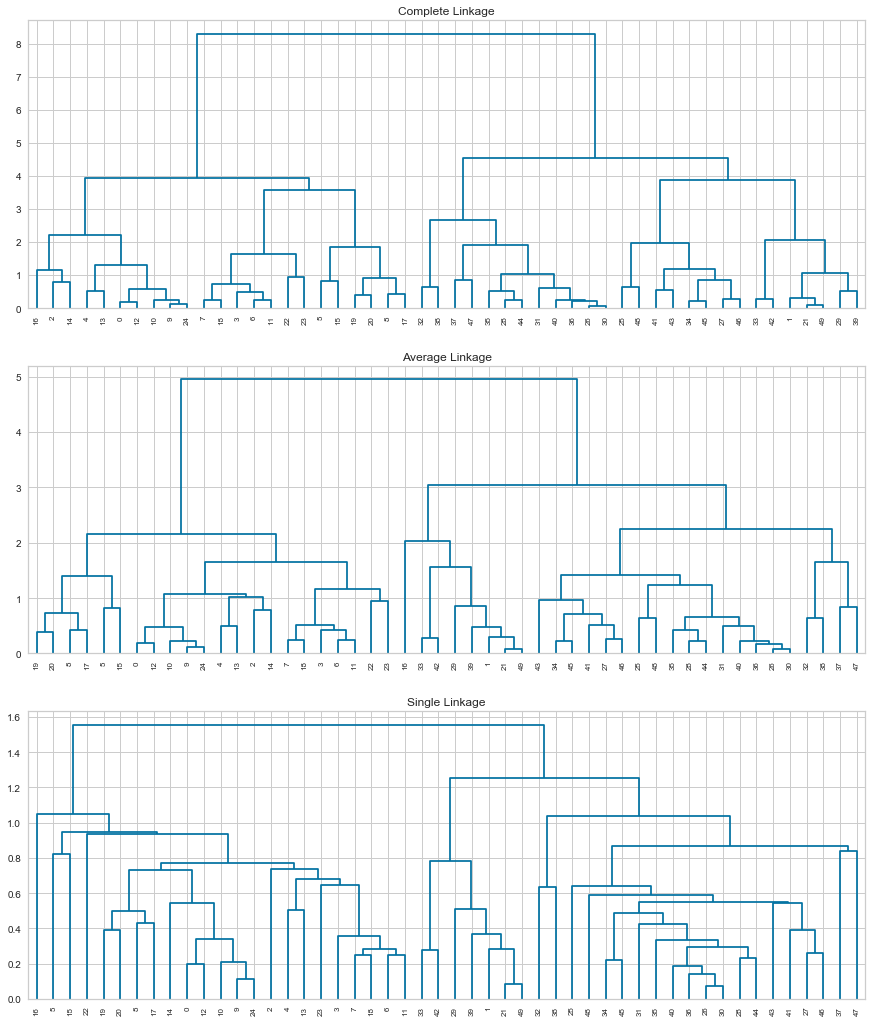

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

### Example 5

In [25]:
df2 = pd.read_csv('Input/NCI60_X.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)

y = pd.read_csv('Input/NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [26]:
X= pd.DataFrame(scale(df2), index=y.type, columns=df2.columns)

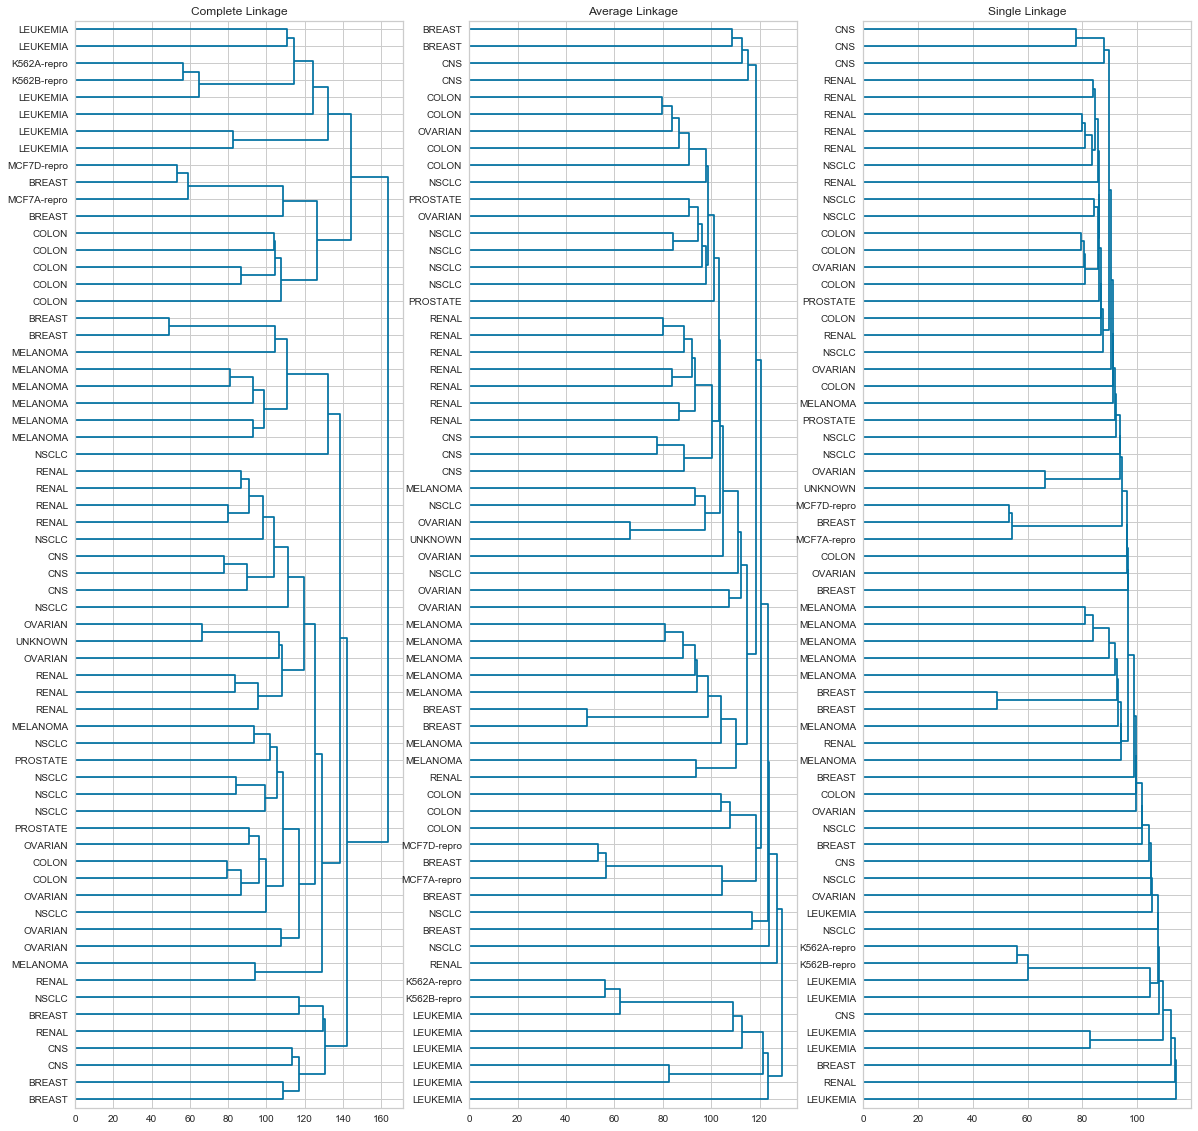

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=X.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

### Conclusion
The clustering technique can be very handy when it comes to unlabeled data. Since most of the data in the real-world is unlabeled and annotating the data has higher costs, clustering techniques can be used to label unlabeled data.